In [12]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import preprocessing

df = pd.read_csv("master.csv")

df = df.sample(frac=1).reset_index(drop=True)
df = df.sample(n = 5000, replace = True)

In [13]:
del df['suicides_no']
del df['country-year']
del df['HDI for year']
del df['generation']

age_groups = {'5-14 years':0, '15-24 years':1, '25-34 years':2, '35-54 years':3, '55-74 years':4, '75+ years':5}
df = df.replace({'age': age_groups})
df['country'] = pd.factorize(df['country'])[0] + 1
df['year'] = pd.factorize(df['year'])[0] + 1
df['sex'] = pd.factorize(df['sex'])[0] + 1


In [14]:
df

,country,year,sex,age,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
23012,1,1,1,3,24066,16.62,"1,551,921,037",9372
18984,2,2,2,1,5931000,10.39,"6,157,459,594,824",50919
25883,3,2,1,0,2710780,1.66,"45,915,191,189",1767
17448,4,3,2,1,510791,6.66,"203,535,242,742",27274
5719,5,4,1,0,50885,0.00,"885,444,186",2142
...,...,...,...,...,...,...,...,...
2320,15,12,1,1,148200,0.67,"31,493,987,642",20076
686,22,4,1,4,822900,38.64,"13,495,075,366",1715
1384,46,15,1,5,1382500,98.81,"516,814,274,022",3789
17372,74,5,1,5,61835,90.56,"25,385,928,198",8420


In [15]:
df.corr()

,country,year,sex,age,population,suicides/100k pop,gdp_per_capita ($)
country,1.000000,0.014370,0.029061,0.001465,-0.178612,-0.064973,-0.213029
year,0.014370,1.000000,-0.009117,0.019065,-0.000783,0.027901,-0.042543
sex,0.029061,-0.009117,1.000000,0.013135,-0.001437,-0.403034,-0.012290
age,0.001465,0.019065,0.013135,1.000000,-0.050487,0.346838,-0.014780
population,-0.178612,-0.000783,-0.001437,-0.050487,1.000000,0.011398,0.065354
suicides/100k pop,-0.064973,0.027901,-0.403034,0.346838,0.011398,1.000000,-0.000087
gdp_per_capita ($),-0.213029,-0.042543,-0.012290,-0.014780,0.065354,-0.000087,1.000000


In [16]:
df.mean()

country               4.507880e+01
year                  1.593500e+01
sex                   1.493000e+00
age                   2.567600e+00
population            1.861182e+06
suicides/100k pop     1.305003e+01
gdp_per_capita ($)    1.705542e+04
dtype: float64

In [17]:
df.var()

country               7.160614e+02
year                  8.232764e+01
sex                   2.500010e-01
age                   2.895609e+00
population            1.565334e+13
suicides/100k pop     3.471661e+02
gdp_per_capita ($)    3.690377e+08
dtype: float64

In [18]:
list = []
for s in df[' gdp_for_year ($) ']:
    list.append(s.replace(',', ''))
df[' gdp_for_year ($) '] = list
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].astype('int64')
df.dtypes

country                 int64
year                    int64
sex                     int64
age                     int64
population              int64
suicides/100k pop     float64
 gdp_for_year ($)       int64
gdp_per_capita ($)      int64
dtype: object

In [19]:
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns).reset_index(drop=True)
print(X)

       country      year       sex       age  population  suicides/100k pop  \
0    -1.647396 -1.646174 -0.986097  0.254132   -0.464383           0.191619   
1    -1.610022 -1.535952  1.014099 -0.921316    1.028762          -0.142778   
2    -1.572648 -1.535952 -0.986097 -1.509040    0.214760          -0.611364   
3    -1.535275 -1.425729  1.014099 -0.921316   -0.341350          -0.342987   
4    -1.497901 -1.315507 -0.986097 -1.509040   -0.457604          -0.700465   
...        ...       ...       ...       ...         ...                ...   
4995 -1.124162 -0.433726 -0.986097 -0.921316   -0.433005          -0.664502   
4996 -0.862545 -1.315507 -0.986097  0.841856   -0.262455           1.373550   
4997  0.034429 -0.103058 -0.986097  1.429580   -0.121001           4.603195   
4998  1.080898 -1.205284 -0.986097  1.429580   -0.454836           4.160374   
4999 -0.115067 -0.764394 -0.986097  1.429580   -0.468030           2.639751   

       gdp_for_year ($)   gdp_per_capita ($)  
0   

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [20]:
PCA().fit(X).components_.T

array([[-3.59808637e-01, -4.86066195e-02,  3.66865760e-01,
        -9.72797516e-02,  3.64110465e-01,  7.66290569e-01,
         6.40659809e-02, -1.54657118e-02],
       [-3.69777045e-02,  6.62212498e-02,  5.57939715e-01,
        -1.40551802e-01, -8.09485894e-01,  8.76702129e-02,
        -1.12357587e-02,  1.07767757e-02],
       [-5.24011695e-02, -5.26550151e-01,  1.82892341e-01,
         6.26045100e-01, -4.03810201e-02, -9.11588980e-02,
         5.33300498e-01,  1.63397503e-02],
       [-2.79081622e-04,  4.57123628e-01,  2.10370492e-01,
         7.24207507e-01,  6.47726099e-02,  2.60521442e-02,
        -4.59135724e-01, -8.13992323e-02],
       [ 5.78965556e-01, -8.57660292e-02,  3.84433256e-01,
        -1.34140148e-01,  2.38843317e-01, -6.34936925e-02,
         2.51584812e-02, -6.55705755e-01],
       [ 7.49656137e-02,  7.04071017e-01,  1.34201618e-02,
        -3.43506774e-03,  5.35100678e-02, -1.06150997e-02,
         7.03267965e-01,  3.01731951e-02],
       [ 6.39610539e-01, -5.617410

In [21]:
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3','V4', 'V5', 'V6', 'V7', 'V8'])
print(pca_loadings)

                          V1        V2        V3        V4        V5  \
country            -0.359809 -0.048607  0.366866 -0.097280  0.364110   
year               -0.036978  0.066221  0.557940 -0.140552 -0.809486   
sex                -0.052401 -0.526550  0.182892  0.626045 -0.040381   
age                -0.000279  0.457124  0.210370  0.724208  0.064773   
population          0.578966 -0.085766  0.384433 -0.134140  0.238843   
suicides/100k pop   0.074966  0.704071  0.013420 -0.003435  0.053510   
 gdp_for_year ($)   0.639611 -0.056174  0.192259  0.008925  0.125233   
gdp_per_capita ($)  0.341324 -0.028421 -0.539884  0.190494 -0.361576   

                          V6        V7        V8  
country             0.766291  0.064066 -0.015466  
year                0.087670 -0.011236  0.010777  
sex                -0.091159  0.533300  0.016340  
age                 0.026052 -0.459136 -0.081399  
population         -0.063494  0.025158 -0.655706  
suicides/100k pop  -0.010615  0.703268  0.030

In [22]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], index=X.index)
df_plot = df_plot.round(3)
print(df_plot)

        PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8
0     0.120  0.810 -1.668 -0.059  0.795 -1.574 -0.611  0.161
1     4.272 -1.437 -1.262  0.573  0.647  0.162  0.684  1.780
2     0.307 -0.607 -1.480 -1.522  0.885 -1.822 -0.367 -0.049
3     0.405 -1.193 -1.822  0.464  0.182 -1.099  0.667  0.069
4    -0.137 -0.600 -1.606 -1.466  0.557 -1.695 -0.441  0.364
...     ...    ...    ...    ...    ...    ...    ...    ...
4995  0.045 -0.295 -1.343 -1.026 -0.309 -0.751 -0.625  0.097
4996 -0.100  1.888 -0.762  0.137  1.108 -1.193 -0.018  0.109
4997  0.114  4.432  0.473  0.298  0.702 -0.306  2.018  0.284
4998 -0.581  4.037 -0.087  0.441  1.742  0.516  1.808  0.165
4999  0.998  2.948 -2.334  1.218 -0.493  1.926  0.845 -0.742

[5000 rows x 8 columns]


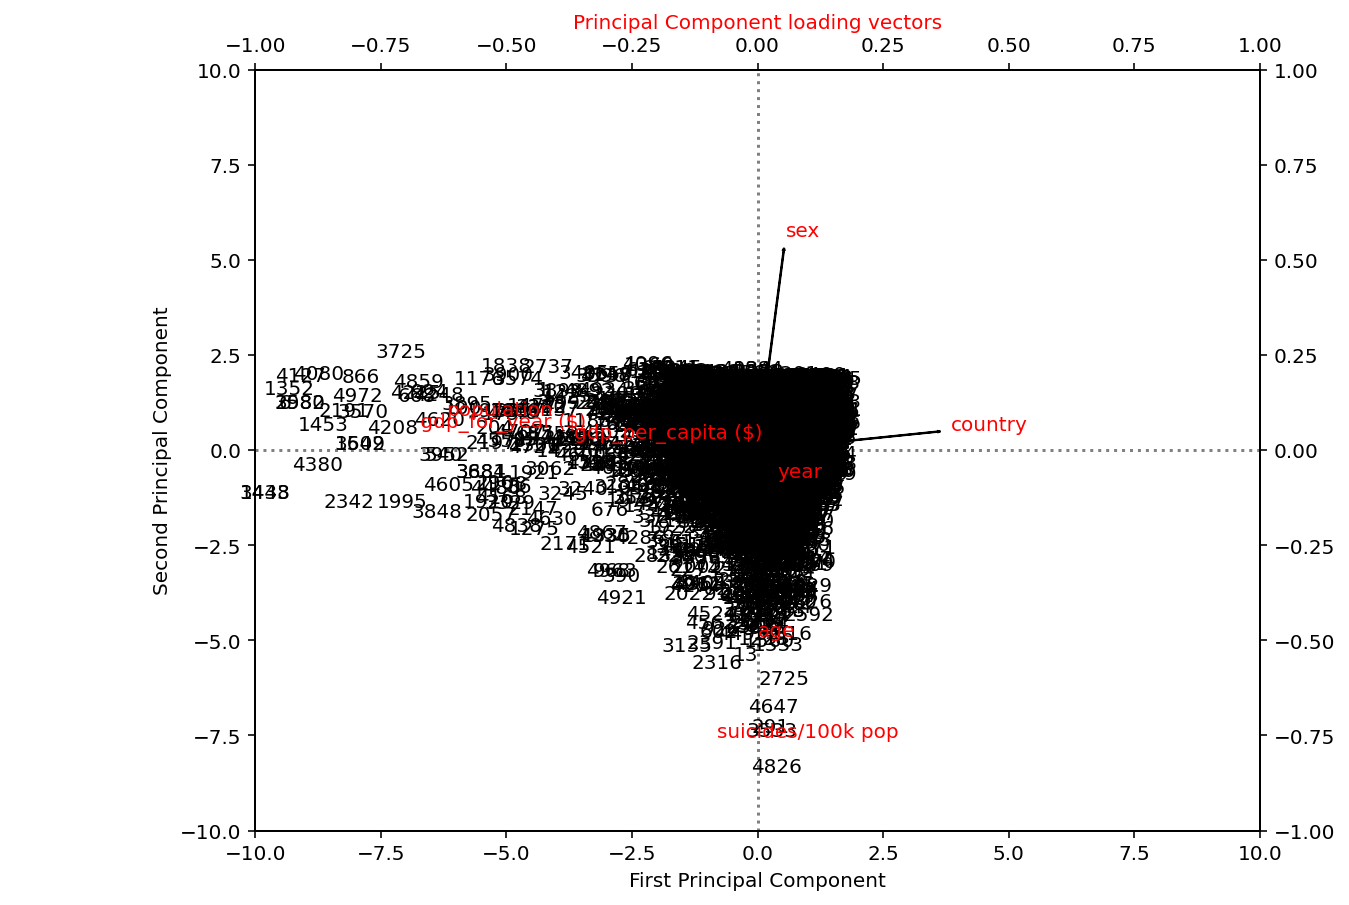

In [23]:
fig , ax1 = plt.subplots(figsize=(9,7))
ax1.set_xlim(-10,10)
ax1.set_ylim(-10,10)
# Plot Principal Components 1 and 2
for i in df_plot.index:ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')
# Plot reference lines
ax1.hlines(0,-10,10, linestyles='dotted', colors='grey')
ax1.vlines(0,-10,10, linestyles='dotted', colors='grey')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')
# Plot labels for vectors. Variable ’a’ is a small offset parameter to separate arrow tip and text.
a = 1.07
for i in pca_loadings[['V1', 'V2']].index:ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')
# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3])

In [24]:
pca.explained_variance_

array([1.89783926, 1.53047056, 1.04674825, 1.01167032, 0.97490939,
       0.79908576, 0.46001734, 0.28085945])

In [25]:
pca.explained_variance_ratio_

array([0.23718246, 0.19127056, 0.13081736, 0.1264335 , 0.1218393 ,
       0.09986574, 0.05749067, 0.03510041])

([<matplotlib.axis.XTick at 0x7fe0380b4250>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

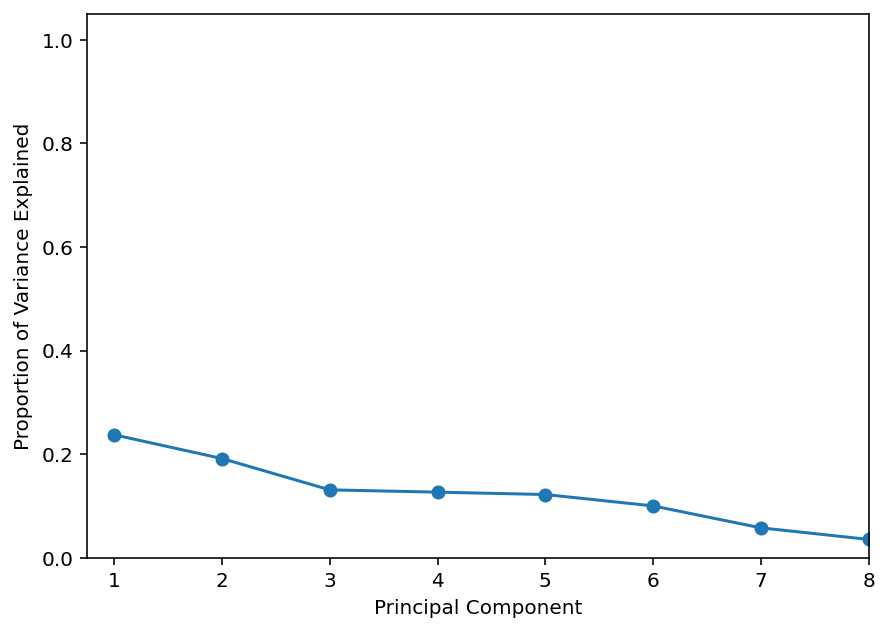

In [26]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,8], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8])
# We can also use the function cumsum(), which computes the cumulative sum of the elements of a numeric
# vector, to plot the cumulative PVE:

([<matplotlib.axis.XTick at 0x7fe0380d6ac0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

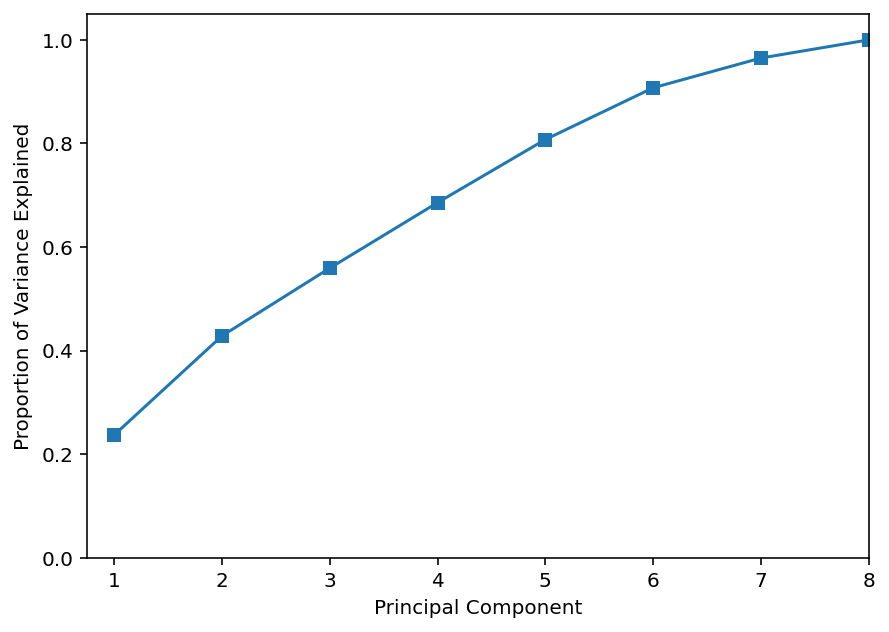

In [27]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,8], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8])